In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,  precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")

df['healthy'] = (df['calories'] < 120).astype(int)

features = ['calories', 'protein', 'fat']
X_raw = df[features]
y = df['healthy']

Multinomial Naive Bayes

In [3]:
scaler_mnb = MinMaxScaler()
X_mnb_scaled = scaler_mnb.fit_transform(X_raw)
X_mnb = np.round(X_mnb_scaled * 100)  

X_train_mnb, X_test_mnb, y_train, y_test = train_test_split(X_mnb, y, test_size=0.3, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train)
mnb_preds = mnb.predict(X_test_mnb)

mnb_acc = accuracy_score(y_test, mnb_preds)
mnb_cm = confusion_matrix(y_test, mnb_preds)

BernoulliNB

In [4]:
binarizer = Binarizer()
X_bin = binarizer.fit_transform(X_raw)
X_train_bnb, X_test_bnb, _, _ = train_test_split(X_bin, y, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train_bnb, y_train)
bnb_preds = bnb.predict(X_test_bnb)

bnb_acc = accuracy_score(y_test, bnb_preds)
bnb_cm = confusion_matrix(y_test, bnb_preds)

Gaussian Naive Bayes

In [5]:
X_train_gnb, X_test_gnb, _, _ = train_test_split(X_raw, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train_gnb, y_train)
gnb_preds = gnb.predict(X_test_gnb)

gnb_acc = accuracy_score(y_test, gnb_preds)
gnb_cm = confusion_matrix(y_test, gnb_preds)

MultinomialNB Accuracy: 0.74
GaussianNB Accuracy: 0.97
BernoulliNB Accuracy: 0.75


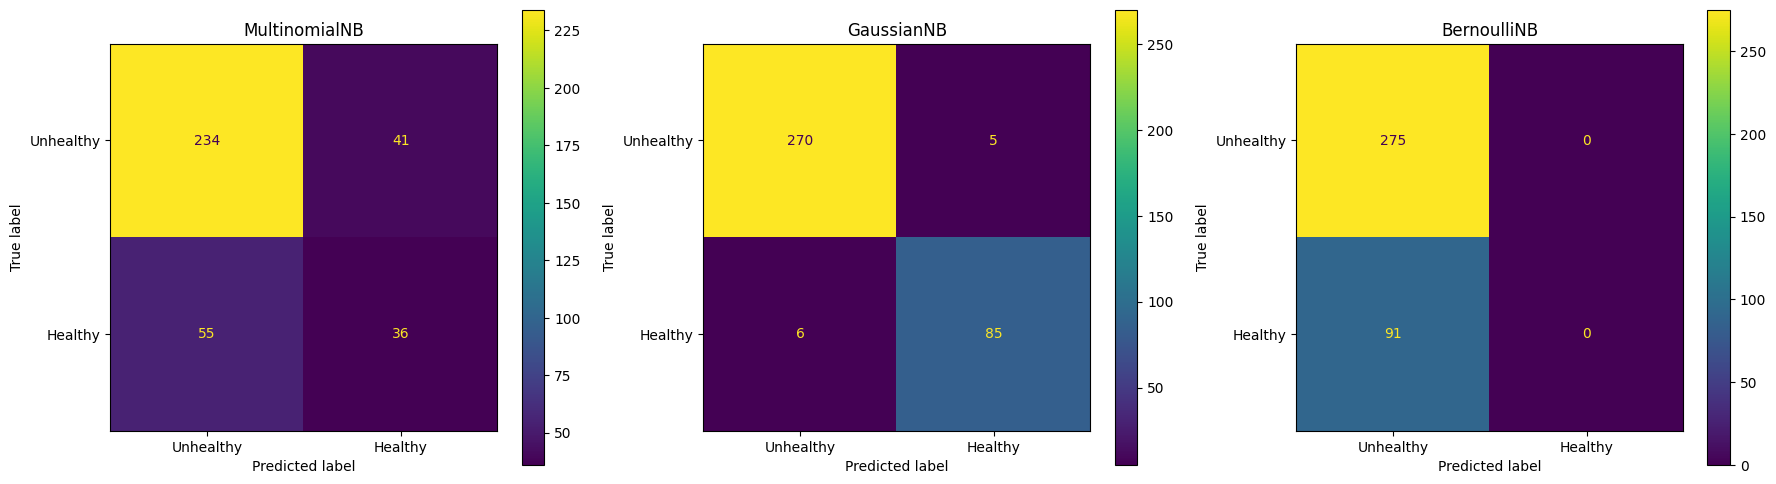

In [6]:
print(f"MultinomialNB Accuracy: {mnb_acc:.2f}")
print(f"GaussianNB Accuracy: {gnb_acc:.2f}")
print(f"BernoulliNB Accuracy: {bnb_acc:.2f}")

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
models = ['MultinomialNB', 'GaussianNB', 'BernoulliNB']
cms = [mnb_cm, gnb_cm, bnb_cm]

for i, cm in enumerate(cms):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Unhealthy', 'Healthy'])
    disp.plot(ax=axs[i], values_format='d')
    axs[i].set_title(models[i])

plt.tight_layout()
plt.show()

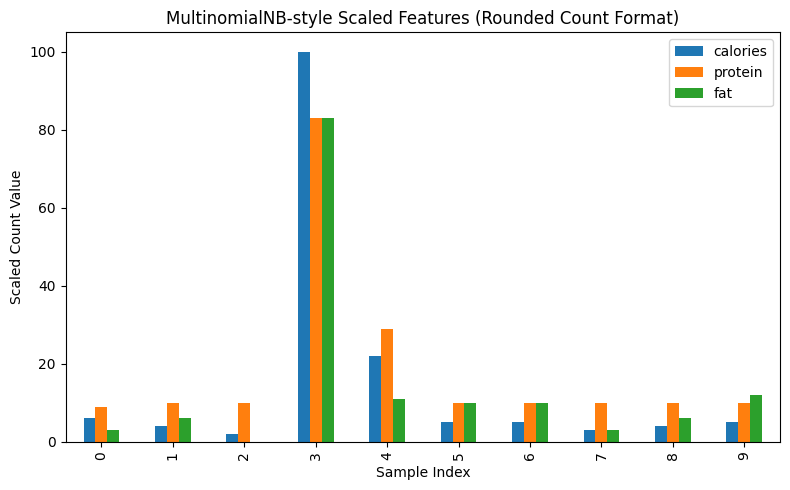

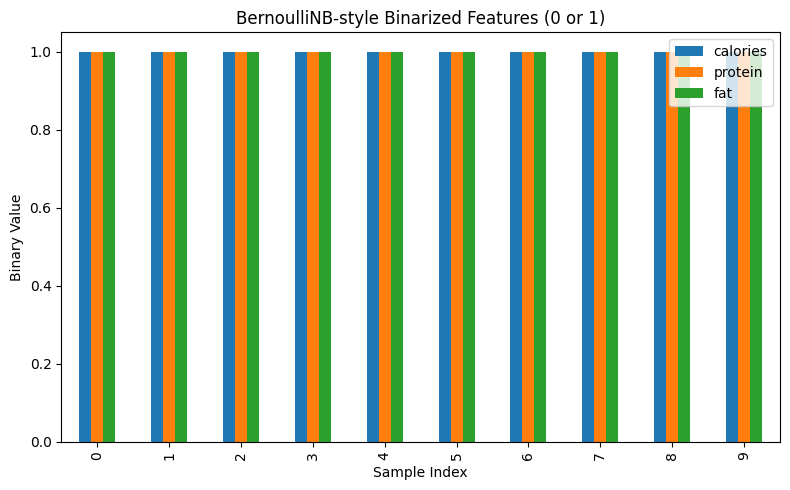

In [7]:
df_selected = df[features].copy()

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)
df_scaled_count = (df_scaled * 100).round()

fig1, ax1 = plt.subplots(figsize=(8, 5))
df_scaled_count.head(10).plot(kind='bar', ax=ax1)
ax1.set_title("MultinomialNB-style Scaled Features (Rounded Count Format)")
ax1.set_ylabel("Scaled Count Value")
ax1.set_xlabel("Sample Index")
plt.tight_layout()

binarizer = Binarizer()
df_binarized = pd.DataFrame(binarizer.fit_transform(df_selected), columns=features)

fig2, ax2 = plt.subplots(figsize=(8, 5))
df_binarized.head(10).plot(kind='bar', ax=ax2)
ax2.set_title("BernoulliNB-style Binarized Features (0 or 1)")
ax2.set_ylabel("Binary Value")
ax2.set_xlabel("Sample Index")
plt.tight_layout()

plt.show()

In [8]:
X = df[features]
y = df['healthy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_df = X_train.copy()
train_df['healthy'] = y_train

test_df = X_test.copy()
test_df['healthy'] = y_test

print("Training Set Sample:")
print(train_df.head(10))
print("\nTesting Set Sample:")
print(test_df.head(10))

Training Set Sample:
      calories  protein    fat  healthy
631      102.0    17.00   0.85        1
215      395.0    18.60  23.30        0
453      250.0     9.38   3.12        0
27        54.0     4.17   2.08        1
1175     327.0    14.63  13.92        0
802      232.0     3.35   4.86        0
390      260.0     8.00   2.00        0
1115     294.0    16.80   8.89        0
490      274.0    10.67   4.53        0
1100     355.0    19.56   7.50        0

Testing Set Sample:
      calories  protein    fat  healthy
542      107.0    16.10   2.68        1
259      390.0     8.26   1.83        0
43        43.0     0.57   1.20        1
1009     239.0    15.63   9.64        0
753      420.0     2.82  12.87        0
310       60.2     9.72   1.01        1
754      439.0     2.51  11.04        0
467      324.0     8.82  16.20        0
210      395.0    25.60  32.10        0
155      393.0    25.00  32.10        0


In [9]:
df.describe()

,calories,protein,fat,carbohydrates,healthy
count,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000
mean,267.916735,11.276448,8.749801,21.879081,0.231337
std,181.521242,6.916424,8.206334,16.942900,0.421860
min,12.000000,0.210000,0.020000,0.070000,0.000000
25%,127.000000,5.395000,2.495000,6.670000,0.000000
50%,252.000000,10.500000,6.300000,17.100000,0.000000
75%,356.500000,16.290000,12.160000,36.545000,0.000000
max,1014.000000,31.800000,32.100000,60.600000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kroger_product  1219 non-null   object 
 1   description     1219 non-null   object 
 2   calories        1219 non-null   float64
 3   protein         1219 non-null   float64
 4   fat             1219 non-null   float64
 5   carbohydrates   1219 non-null   float64
 6   healthy         1219 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 66.8+ KB


c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


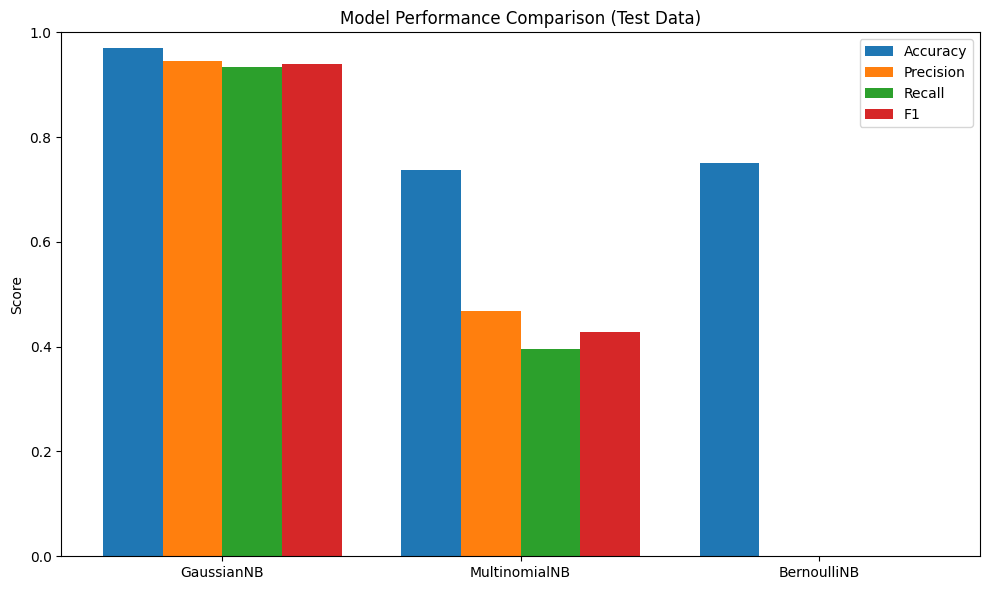

In [11]:
model_scores = {}

# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
model_scores['GaussianNB'] = {
    'accuracy': accuracy_score(y_test, y_pred_gnb),
    'precision': precision_score(y_test, y_pred_gnb),
    'recall': recall_score(y_test, y_pred_gnb),
    'f1': f1_score(y_test, y_pred_gnb),
    'cv': np.mean(cross_val_score(gnb, X, y, cv=5))
}

# MultinomialNB
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) * 100
X_train_mnb, X_test_mnb, y_train_mnb, y_test_mnb = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train_mnb)
y_pred_mnb = mnb.predict(X_test_mnb)
model_scores['MultinomialNB'] = {
    'accuracy': accuracy_score(y_test_mnb, y_pred_mnb),
    'precision': precision_score(y_test_mnb, y_pred_mnb),
    'recall': recall_score(y_test_mnb, y_pred_mnb),
    'f1': f1_score(y_test_mnb, y_pred_mnb),
    'cv': np.mean(cross_val_score(mnb, X_scaled, y, cv=5))
}

# BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train > 0, y_train)
y_pred_bnb = bnb.predict(X_test > 0)
model_scores['BernoulliNB'] = {
    'accuracy': accuracy_score(y_test, y_pred_bnb),
    'precision': precision_score(y_test, y_pred_bnb),
    'recall': recall_score(y_test, y_pred_bnb),
    'f1': f1_score(y_test, y_pred_bnb),
    'cv': np.mean(cross_val_score(bnb, X > 0, y, cv=5))
}

# Plotting the test metrics
metrics = ['accuracy', 'precision', 'recall', 'f1']
labels = list(model_scores.keys())
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, metric in enumerate(metrics):
    values = [model_scores[model][metric] for model in labels]
    ax.bar(x + i*width, values, width, label=metric.capitalize())

ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison (Test Data)")
ax.legend()
plt.tight_layout()
plt.show()


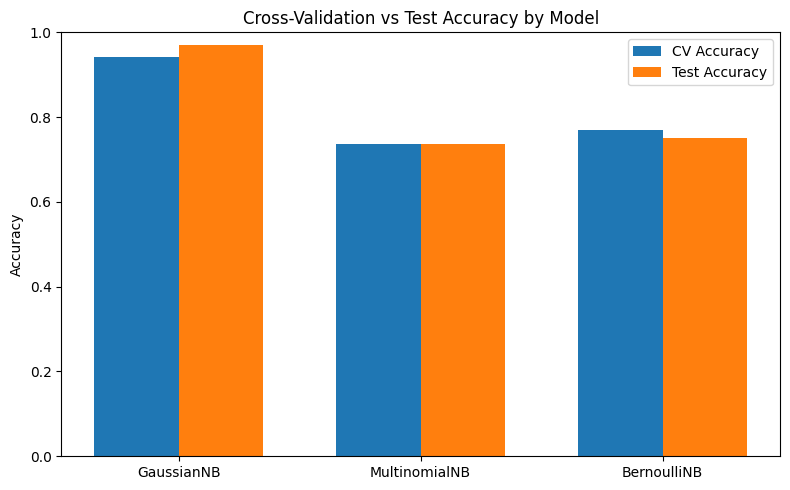

In [12]:
model_names = list(model_scores.keys())
cv_scores = [model_scores[name]['cv'] for name in model_names]
test_accuracies = [model_scores[name]['accuracy'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(x - width/2, cv_scores, width, label='CV Accuracy')
ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Cross-Validation vs Test Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.show()